In [3]:
 from google.colab import files
 uploaded = files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [4]:
import pandas as pd

df = pd.read_csv("Credit_Card_Applications.csv")
print(df.head())


   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


In [6]:
print(df.info())

print(df.describe())

print(df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB
None
         CustomerID          A1          A2          A3          A4  \
count  6.900000e+02  690.0000

In [7]:
print(df.isnull().sum())
print(df.duplicated().sum())

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64
0


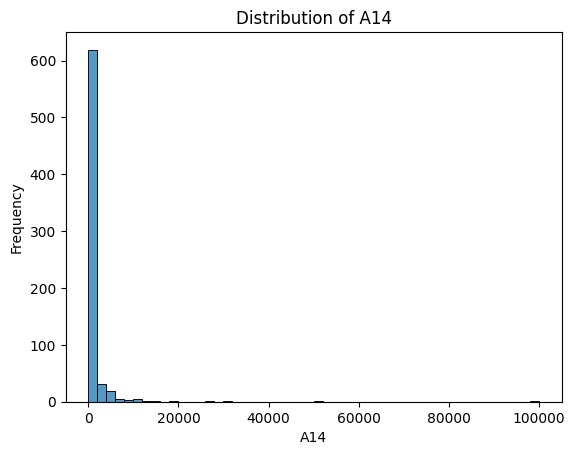

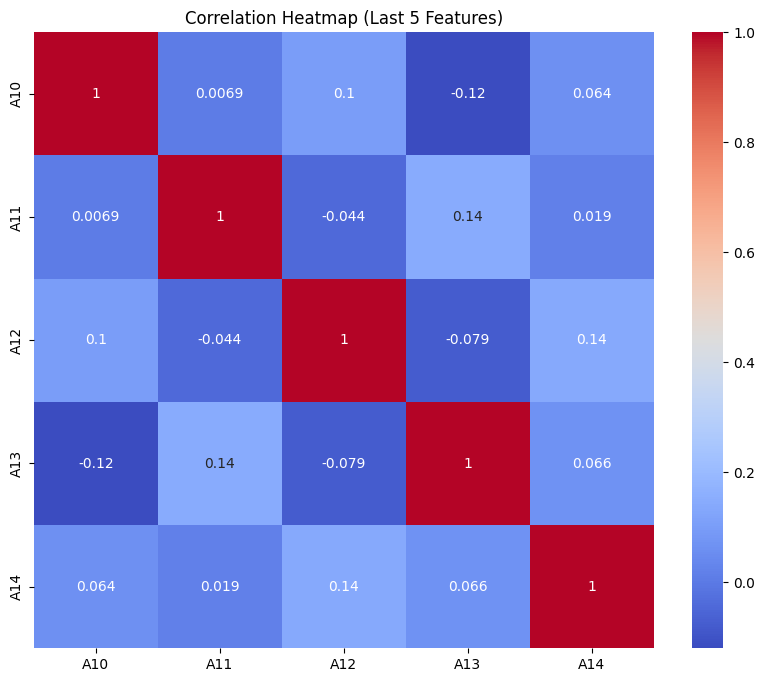

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a likely numeric feature (e.g., A14)
sns.histplot(df['A14'], bins=50)
plt.title('Distribution of A14')
plt.xlabel('A14')
plt.ylabel('Frequency')
plt.show()

# Heatmap of the correlation among the last 5 features
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, -6:-1].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Last 5 Features)')
plt.show()


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']
X = pd.get_dummies(X, drop_first=True)



In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        77
           1       0.77      0.89      0.82        61

    accuracy                           0.83       138
   macro avg       0.83      0.84      0.83       138
weighted avg       0.84      0.83      0.83       138

Confusion Matrix:
 [[61 16]
 [ 7 54]]


In [17]:
import numpy as np

# Simulated input with 15 feature values, matching the original data's features
# ***You need to ensure that the input values and their order match the features used during training.***
# ***For example, if 'A1, A2, ... A15' were your original features, then ensure the new_input values correspond to them.***

# Example with placeholder values - replace with actual input values:
new_input = np.array([[0, 22.5, 10.0, 2, 4, 4, 1.5, 0, 0, 0, 1, 2, 100, 1200, 1]]) # Added a placeholder value for the 15th feature

# Scale the input
new_input_scaled = scaler.transform(new_input)

# Make prediction
prediction = model.predict(new_input_scaled)
print("Predicted class:", prediction[0])

Predicted class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
input_df = pd.DataFrame(new_input, columns=df.drop('Class', axis=1).columns)


In [19]:
if prediction[0] == 1:
    print("Fraudulent transaction")
else:
    print("Legitimate transaction")


Legitimate transaction


In [20]:
!pip install -q gradio scikit-learn pandas joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
df = pd.read_csv("Credit_Card_Applications.csv")

# Separate features and target
X = df.drop(columns=["Class"])  # Removed "Time" which doesn't exist
y = df["Class"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model, scaler, and feature names
joblib.dump(model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']

In [23]:
import gradio as gr

model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_names = joblib.load("feature_names.pkl")

def predict_fraud(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)[0]
    return "Fraud" if prediction == 1 else "Not Fraud"

inputs = [gr.Number(label=col) for col in feature_names]
interface = gr.Interface(fn=predict_fraud, inputs=inputs, outputs="text", title="Credit Card Fraud Detection")

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cdbcf3bcade4803d6d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
